# Local Voting Behavior
A friend of mine running for the local council has procured the voter registration data for the area and shared it with me. With a view to helping them campaign effectively and efficiently I have investigated and analyzed the voter characteristics and how these can be used to predict who to focus campaigning efforts on.

## Customer:
Politically active people who want to help run effective candidate marketing campaigns:
 - Which households should I target for phone calling and mailing?
  - Who is likely to vote
  - What is their party registration so I can tailor my message
 -  Are they any gross voter trends that will help me with targeting:
  - Do people in apartments vote as much as others?
  - Is vote frequency affected by other household characteristics
  - What is the nature of frequent voters?

## Data Cleaning and Wrangling
The data has come from the official voter registration office and so contained a significant amount of Personally Identifiable Information (PII). It also contains household level information as well as voter level information. A number of steps were taken to clean and process the data ready for further analysis and predictive modeling.

### Data that was Dropped:
Columns that included no valuable information or was too sparsely populated were dropped. This included:

Status (all values were the same), LastVoted (only 6 entries), Salutation (6388 missing values), HouseNumberSuffix and StreetPrefix (empty), Building number, City & State (all the same), Military (only 9 entries)

### Personally Identifiable Information (PII), 
All PII was removed from the data so I could share my analysis freely. In come cases (as noted below) I used the full data to fill missing values in other columns or to extract usable summary information prior to dropping. Columns treated this way included:

Affidavit, Last name, First name, used with a name database to fill missing gender data before dropping.
Middle name, & Suffix, House number, Street, used to create StreetType and then dropped, ApartmentNumber used to create a boolean 'isApt' field and then dropped. ImageID, Phone fields were converted into True/False fields, Birth date was cleaned into BirthYear and the full date dropped, email cleaned to service provider level only
    
### Household and Voter relationship
The data had an identifier for all households (voters living at the same street address), I created my own unique ID for voters and households populated the data and then dropped the original keys to maintain anonymity of the data. I kept a record of the original key and a lookup table to enable final predictions to be linked back to the original data for use by my friend in his campaigning.

All columns were analyzed for missing values and consistent categories. Where necessary data was converted and 'UNK' or '-1' used for missing values.

### Final Voter Data
| Original Data Column | Description of action | output column(s) |
|:---:|:---|:---:|
| 'VoterID' | Rows of table were randomly shuffled, the index reset and the new index used as new UID. | 'vid' |
| 'Abbr' | Kept as is, although it’s not understood it is a clean number. | 'Abbr' |
| 'StreetType' | Populate missing values using 'Street': ‘Common’ => ‘CMN’ ‘GREEN’ => ‘GRN’ and two cross streets => ‘UNK’. Combine small categories together 'PL' and 'TER' => 'PL/TER', 'RD', 'LN', 'PKWY', 'LOOP', 'GRN' AND 'CIR' => 'OTH'  | 'StreetType' |
| 'ApartmentNumber' | Converted to a True/False field. | 'isApt' |
| 'Zip' | Cleaned all to 5 digit numerical zip code entries.  | 'Zip' |
| 'Precinct' | Converted to number and kept. | 'Precinct' |
| 'PrecinctSub' | Converted to number and kept. | 'PrecinctSub' |
| 'Party' | Converted to category and kept. Also created a 'PartyMain' field by combining all the small parties into an 'OTH' category | 'Party', 'PartyMain' |
| 'RegDate' | Converted to a dateTime and kept. | 'RegDate' |
| 'Phone1' | 5266 NaN's 8041 values, converted to True/False. | 'havePhone' |
| 'Gender' | 5223 NaN's 1743 ‘F’ and 1717 ‘M’ were added by comparing FirstName data to a database of name genders (https://github.com/organisciak/names), remaining missing data was set to ‘UNK’.  | 'Gender' |
| 'PAV' | Is voter a Permanent Absentee Voter, converted to category and kept. | 'PAV' |
| 'BirthPlace ' | This mixed two and three letter code was assumed to be a two USA state code, and only if that failed to match assumed to be a two or three letter country code. Output was 2 clean columns with state and or country, plus 2 clean columns with State and Country Region information. State, Country and Region code data gathered from wikipedia,  'UNK' added for the 1296 NaN's. | 'BirthPlaceState', 'BirthPlaceStateRegion', 'BirthPlaceCountry', 'BirthPlaceCountryRegion' |
| 'BirthDate' | Cleaned full birthday into 'BirthYear', rest dropped as PII. | 'BirthYear' |
| | Used BirthDate to calculate Oldest in Household Birth Year and if you are the oldest in your house hold | 'OldestInHouseBirthYear', 'IsOldestInHouse' |
| Mailing Address columns | Compared with main address to create a True/False, Country kept as a category. | 'sameMailAddress', 'MailCountry' |
| 'email' | 9009 NaN's, Cleaned to keep the service provider with UNK for NaNs. | 'EmailProvider' |
| 'RegDateOriginal' | Converted to a dateTime and kept. | 'RegDateOriginal' |
| 'District' | Kept as is in case we need to add in other district data. | 'District' |
| 'VoterScore' | Score assigned by my friend based on which election someone has reported data for and voted (A or V) | 'VoterScore' |
| 'VoterScorePossible' | Score assigned by my friend assuming all reported data was 'vote' (A or V) | 'VoterScorePossible' |
| 'VoterScorePctOfPoss' | 'VoterScore'/'VoterScorePctOfPoss' | 'VoterScorePctOfPoss' |
| Household | Unique key linking each voter to a household, looked up and converted to anonymized Hid. | 'Hid', cHid |

Full details in '05_Cleaning Voter' notebook

### Final Household Data
| Original Data Column | Description of action | output column(s) |
|:---:|:---|:---:|
| 'Household_Id' | Rows of table were randomly shuffled, the index reset and the new index used as new UID. | 'hid', 'cHid' |
| 'StreetType' | ‘CMN’ ‘GREEN’ => ‘GRN’ and two cross streets => ‘UNK’. Also combined some smaller groups. | 'StreetType' |
| 'ApartmentNumber' | Converted to a True/False field. | 'isApt' |
| 'Zip' | Cleaned all to 5 digit numerical zip code entries. | 'Zip' |
| 'Precinct' | Converted to number and kept. | 'Precinct' |
|  | The Precinct was also used to create a 'CityArea' column | 'CityArea' |
| 'PrecinctSub' | Converted to number and kept. | 'PrecinctSub' |
| 'District' | Kept as is in case we need to add in other district data. | 'District' |

3 extra households were identified as having duplicate entries due to one or more members of the household entering their house number as an apartment number. the cHid field was created to clean this up - correctly combining these households and the 11 effected voters.

Full details in '05_Cleaning HouseHold' notebook

## Voting behavior data
Data on Voting behavior for 6 prior elections was included in the data. A particular voter had an entry if they have been registered to vote for that election and that entry contained the following key:

| Entry | Description |
|:---:|:---|
| A | The voter voted using an Absentee Ballot |
| V | The voter voted in person |
| N | The voter didn't vote |

y(xxx) : For some of the primary elections the voter status was communicated as y and the type of ballot used was captured by the xxx, A(REP) indicated a vote cast on an Absentee Republican ballot. In these cases the ballot types were extracted into their own fields and then different combinations of election vote data processed to enable vote rate analysis to be completed on the different election combinations. I also created a 'Ground Truth' column for each of the 6 elections where $1$ indicated the voter voted (ie had a 'A' or 'V') and $0$ indicated they didn't (ie had a 'N'), this was to facilitate training of our predictive model.

| Original Data Column | Description of action | output column(s) |
|:---:|:---|:---:|
| 'E1_110816' | Code indicated vote, converted to category and kept. | 'E6_110816', E6_GndTth |
| 'E2_060716' | Code indicated vote and ballot used, Cleaned into 'Vote' and 'BallotType' and kept. | 'E5_060716', 'E5_060716BT' ,E5_GndTth |
| 'E3_110414' | Code indicated vote, converted to category and kept. | 'E4_110414', E4_GndTth |
| 'E4_060314' | Code indicated vote, converted to category and kept. | 'E3_060314', E3_GndTth |
| 'E5_110612' | Code indicated vote, converted to category and kept. | 'E2_110612', E2_GndTth |
| 'E6_060512' | Code indicated vote and ballot used, Cleaned into 'Vote' and 'BallotType' and kept. | 'E1_060512','E1_060512BT', E1_GndTth |

For each election or group of elections to be analyzed I calculated The total number of votes that could have been  cast from voters in my data, the number of votes actually cast and the proportion of successes (ie cast votes). 

| Description of action | output column(s) |
|:---|:---:|
| Column indicating number of elections voter has been registered for. Ie how many times they had an entry ('A','V', or 'N') in one of the election columns of interest | '\_nVotesPos' |
| Column indicating number of elections voter actually voted in. Ie how many of their entries were 'A' or 'V' | '\_nVotes' |
| Column indicating % of possible elections actually voted in. In $\frac{\_nVotesPos}{\_nVotes}$ | '\_nVotesPct' |

The groups of elections analyzed included:

| Prefix used | Elections |
|:---|:---:|
| 'E6' | a General Presidential election held on Nov 8th 2016 |
| 'E5' | a Primary election held on Jun 7th 2016 |
| 'E4' | a General Congressional election held on Nov 4th 2014 |
| 'E3' | a Primary election held on Jun 3th 2014 |
| 'E2' | a General Presidential election held on Nov 6th 2012 |
| 'E1' | a Primary election held on Jun 5th 2012 |
| 'E12' | a combination of both elections held in 2012 |
| 'E14' | a combination of both elections held in 2014 |
| 'E16' | a combination of both elections held in 2016 |
| 'E34' | also a combination of both elections held in 2012 |
| 'E56' | a combination of both elections held in 2012 & both elections held in 2014 |
| 'E78' | a combination of all 6 elections |
| 'Eap' | a combination of the 3 primary elections |
| 'Eag' | a combination of the 3 general elections |

Full details in '07_Vote Rates' notebook

### Election general information
I also collected some general information about the environment at the time of each of these elections. Mostly from wikipedia:

| output column(s) | Description of data |
|:---|:---|
| 'election' | Unique ID for each election held between 2012 and 2018, including this years target for predicting voting. |
| 'dates' | Actual date of the election. |
| 'cycle ' | Is this a Congessional only election year or a Presidential election year. |
| 'etype' | Is this a 'Primary' or 'General' election. |
| 'president' | What is the party of the president in power at the time of the election. |
| 'us_senate_maj' | How big is the controlling margin in the US Senate. Positive numbers indicate a REP maj, negative a DEM one. |
| 'us_repre_maj' | How big is the controlling margin in the US House of Representatives. Positive for REP maj, negative for DEM. |
| 'ca_governor' | Which party did the Governor of CA belong too at the election. |
| 'ca_lt_govnor' | Which party did the Lieutenant Governor of CA belong too at the election. |
| 'ca_senate_maj' | How big is the controlling margin in the CA Senate. Positive for REP maj, negative for DEM. |
| 'ca_assembly_maj' | How big is the controlling margin in the CA Assembly. Positive for REP maj, negative for DEM. |

Full details in '05_Election information' notebook

### Finally some additional fields were calculated and added to the data set
Mainly relating to household level derived features from the individual voter data:

-  Number of voters in HH,
-  Number of PAV,
-  Number with party affiliation
-  Number of DEM party affiliation in HH
-  Number of REP party affiliation in HH
-  Number of NPP party affiliations in HH
-  Party with most affiliations in HH
-  Mixed affiliations True/False (all affiliated with same party)
-  All voters affiliated
-  Uniform affiliations (all same party or all NPP)

And at the Voter level
-  Oldest in household

All these fields were made available in the household data and at the Voter level in the voter data

Full details in '09_Clean Data Features' notebook

In [1]:
# imports and loading clean data
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

from IPython.display import display, Markdown

from modules.lv_utils import load_households, load_voters
from modules.ms1_utils import clean_df, show_vote_rate_and_summary, two_sample_perm_test_diff_frac_votes
from modules.ms1_utils import get_two_sample_ns, plot_hist_vote_rate_vs_field

# load the data
households = load_households('data_clean/20180725_fullset_households_district3.csv')
voters = load_voters('data_clean/20180725_fullset_voters_district3.csv')
elections = pd.read_csv('data_clean/20180621_election_data.csv')

# a couple of constants
outcols = ['votes_s0','elec_n0','rate_r0','votes_s1','elec_n1','rate_r1','emp_diff','perm_p']

## Exploring the data (with stats)

In [2]:
# Initial Intro to our data
display(Markdown('Our data covers one district, containing information about **{}** Voters and **{}** Households.'.format(
        voters.shape[0], households.shape[0])))
display(Markdown('It contains information about both primary and general elections held in 2012, 2014, 2016'))
elections = ['E6_110816', 'E5_060716', 'E4_110414', 'E3_060314', 'E2_110612', 'E1_060512']
pre = ['E6', 'E5', 'E4', 'E3', 'E2', 'E1']

df = pd.DataFrame(columns = ['Number of Votes Possible', 'Number of Votes Cast', 'Votes Percent cast/possible'])

for (e,k) in zip(pre,elections):
    ef = [e+'_nVotesPct', e+'_nVotesPos', e+'_nVotes']
    df_w = clean_df(voters.loc[:,ef], [], ef)
    df.loc[k,['Number of Votes Cast', 'Number of Votes Possible']] = [df_w.sum()[0],df_w.sum()[1]]
    df['Votes Percent cast/possible'] = df['Number of Votes Cast']/df['Number of Votes Possible']

display(df)

Our data covers one district, containing information about **13307** Voters and **6930** Households.

It contains information about both primary and general elections held in 2012, 2014, 2016

,Number of Votes Possible,Number of Votes Cast,Votes Percent cast/possible
E6_110816,12342,9220,0.747043
E5_060716,11101,4846,0.436537
E4_110414,9987,4314,0.431962
E3_060314,9727,2807,0.288578
E2_110612,9296,6937,0.746235
E1_060512,8577,2577,0.300455


An Initial analysis was completed of some of the high level commonly repeated 'true'isums about voter behavior to see how similar to these 'standards' our voters were.

These included:
 - People vote less in Primaries
 - Older votes are more likely to vote

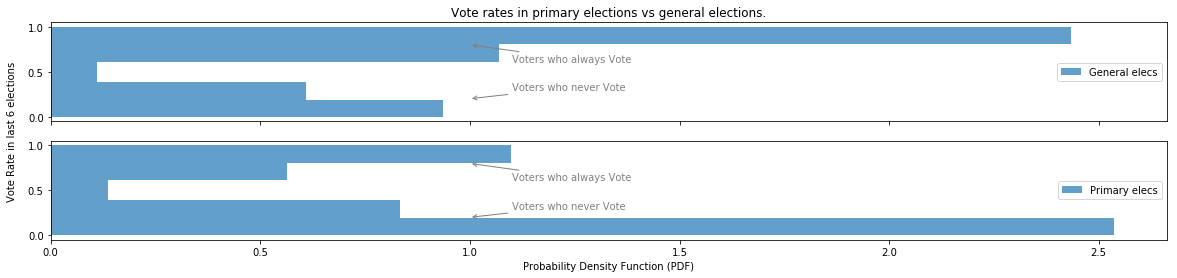

Number of Voters                   Voters as a %                  
              General elecs Primary elecs General elecs_pct Primary elecs_pct
Always                 5725          2334              46.3              20.9
Over Half              2647          1260              21.4              11.3
Half                    298           337               2.4               3.0
Under Half             1506          1862              12.2              16.7
Never                  2200          5384              17.8              48.2
Totals                12376         11177             100.1             100.1

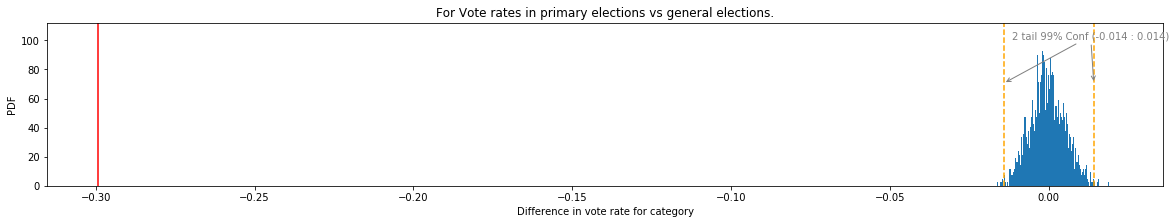

,votes_s0,elec_n0,rate_r0,votes_s1,elec_n1,rate_r1,emp_diff,perm_p
All primary vs general elections,10230,29405,34.79,20471,31625,64.7304,-29.9404,0


In [3]:
# Gather data
vs, f = ['Eag_nVotesPct','Eag_nVotesPos', 'Eag_nVotes','Eap_nVotesPct','Eap_nVotesPos', 'Eap_nVotes'],[]
df_w = clean_df(voters.loc[:,vs + f], f, vs)
title = 'Vote rates in primary elections vs general elections.'
df = show_vote_rate_and_summary(df_w[['Eag_nVotesPct','Eap_nVotesPct']], ['General elecs','Primary elecs'], title)

# Summarize data
dx = df_w[['Eap_nVotesPos', 'Eap_nVotes']]
dy = df_w[['Eag_nVotesPos', 'Eag_nVotes']].rename(columns={'Eag_nVotesPos':'Eap_nVotesPos','Eag_nVotes':'Eap_nVotes'})

fig, axes = plt.subplots(figsize=(20,3))

df = pd.DataFrame(columns=outcols)
sx,nx,rx,sy,ny,ry = get_two_sample_ns(dx, dy)
pp, emp_diff, axes = two_sample_perm_test_diff_frac_votes(dx,dy,axes,title, tail=2)   
df.loc['All primary vs general elections',outcols] = [sx,nx,rx,sy,ny,ry,emp_diff*100,pp]

plt.show()
display(df)

Our data confirmed that across the 3 primary elections and 3 general elections people were $30\%$ less likely to vote in primary elections than general elections. Using a two sample permutation test we can conclude that this difference is statistically significant at a confidence level of $99\%$.

When looking at birth year aka age, I excluded people who's birth year was entered as 1900

There are 12 people over 100 (inc 7 people entering 1900 who were removed as likely bad data)

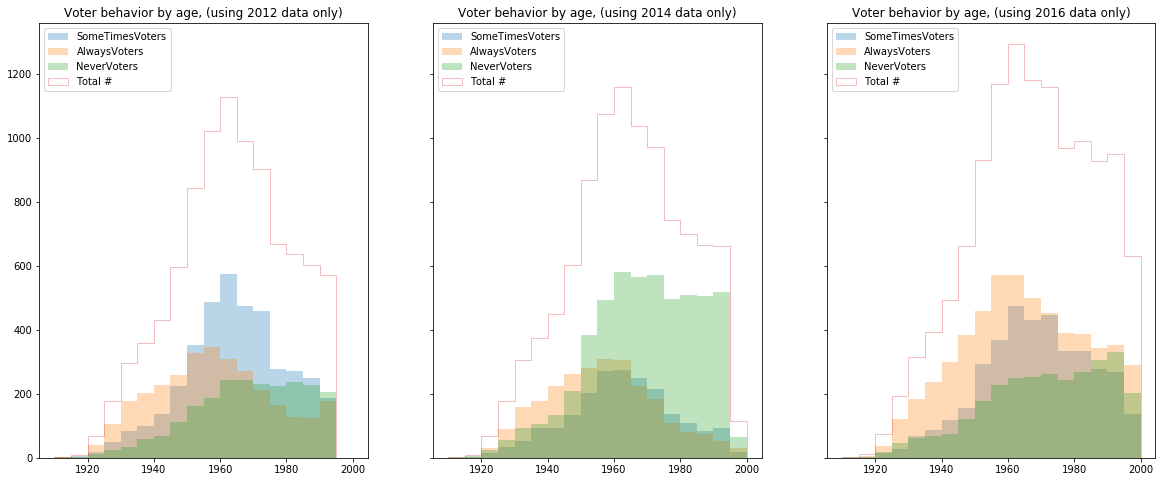

In [4]:
vs, f = ['E12_nVotesPct','E14_nVotesPct','E16_nVotesPct'],['BirthYear']
df = clean_df(voters.loc[:,vs + f], f, vs)

old = df.BirthYear < 1901
display(Markdown('There are {} people over 100 (inc {} people entering 1900 who were removed as likely bad data)'.format(
df[df.BirthYear < 1918].BirthYear.count(),df[df.BirthYear == 1900].BirthYear.count())))

# cutting out the outliers
df = df[~old]

# Summarize data
fig, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(20,8))
d = [0 for i in range(3)]
bins = [c for c in range(1910, 2001, 5)]

ax1, d[0] = plot_hist_vote_rate_vs_field(ax1, df, 'E12_nVotesPct', 'BirthYear', bins)
ax1.set_title('Voter behavior by age, (using 2012 data only)')

ax2, d[1] = plot_hist_vote_rate_vs_field(ax2, df, 'E14_nVotesPct', 'BirthYear', bins)
ax2.set_title('Voter behavior by age, (using 2014 data only)')

ax3, d[2] = plot_hist_vote_rate_vs_field(ax3, df, 'E16_nVotesPct', 'BirthYear', bins)
ax3.set_title('Voter behavior by age, (using 2016 data only)')

plt.show()

When I completed a 2 sample boot hypothesis test to identify if the mean age of the always vote and never vote groups could be zero and us still see the variation in group mean by chance I was able to confirm the following:

In [5]:
# Detailed workings available in 12_Inf Stat Vote Rate by feature
df = pd.DataFrame({'Year':[2012, 2014, 2016], 
                   'Always Vote Mean birth year':[1958, 1956, 1964],
                   'Never Vote Mean birth year':[1968, 1969, 1971],
                   'Difference':[10.1, 12.9, 6.29],
                   'estimated p-value':[0,0,0]}).set_index('Year')
display(df)

,Always Vote Mean birth year,Never Vote Mean birth year,Difference,estimated p-value
Year,,,,
2012,1958,1968,10.10,0
2014,1956,1969,12.90,0
2016,1964,1971,6.29,0


You can see in these histograms that the Always Voters skew older (having birth years to the left of the graphs) and the Never Voters skew younger with birth years to the right of the graphs. This is a particularly strong effect in the Congressional year of 2014.

You can also see that the young are less likely to have registered to vote in the first place as the total voter histograms all show a peak around birth year 1960. Its also possible that this effect is caused not by younger voters not registering but by our district having fewer younger voters living here. It is also plausible that younger voters are more mobile and so even if they were here for the 2012 or 2014 vote they have since moved out of the district and so dropped out of our data set and you can't forget that there may just be more people born in the 1960's. We would need additional demographic data about our voting district to identify which of these hypothesis held true.

# Overview of correlations
Now that we are a little more familiar with our data I started to explore some of the other characteristics or voter features and how they related to someone's vote rate. 

From a full correlation Matrix review I could see the following relationships that I explored and want to share:
 - Being affiliated with a political party increases your vote rate
 - Being a Permanent Absentee Voter increases you vote rate
 - Gender does not significantly affect your vote rate
 - Voters who live at an address with an apartment number are less likely to vote
 - Voters who live in household where everyone is affiliated with a party are more likely to vote 
 
 Some more details and additional relationships are explored in the accompanying notebook `12_Inf Stat Vote Rate by feature`

## How does being affiliated with a political party effect your vote rate?
Now that we are a little more familiar with our data I started to explore some of the other characteristics or voter features and how they related to someone's vote rate. Starting with if they were affiliated with a political party.

Voters in our data were affiliated with 23 unique party groups including 'No Party Preference' (NPP). For more detailed analysis I grouped all the small party affiliations into an 'OTH' group. 

In [6]:
df = pd.DataFrame(voters.Party.value_counts().head(3)).rename(columns = {'Party':'Count of Affiliated Voters'})
df

,Count of Affiliated Voters
DEM,6634
NPP,4173
REP,1952


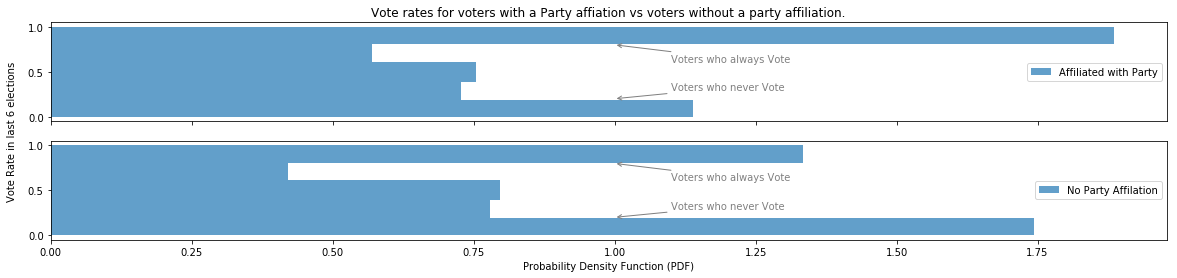

Number of Voters                      \
           Affiliated with Party No Party Affilation   
Always                      3074                 962   
Over Half                    977                 319   
Half                        1426                 665   
Under Half                  1248                 591   
Never                       1859                1257   
Totals                      8584                3794   

                       Voters as a %                          
           Affiliated with Party_pct No Party Affilation_pct  
Always                          35.8                    25.4  
Over Half                       11.4                     8.4  
Half                            16.6                    17.5  
Under Half                      14.5                    15.6  
Never                           21.7                    33.1  
Totals                         100.0                   100.0

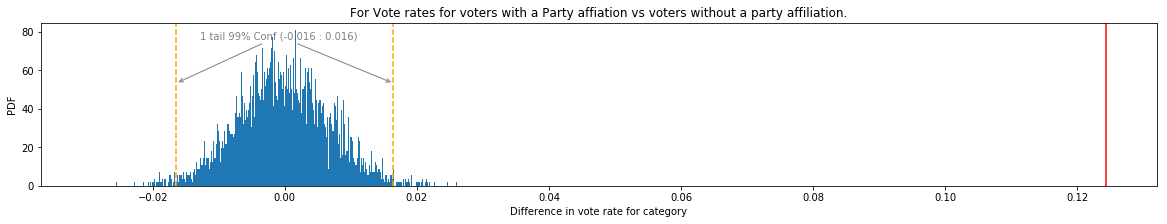

,votes_s0,elec_n0,rate_r0,votes_s1,elec_n1,rate_r1,emp_diff,perm_p
All primary vs general elections,23377,43368,53.9038,7324,17662,41.4676,12.4362,0


In [7]:
# Gather data
e = 'E78'
vs, f = [e+'_nVotesPct', e+'_nVotesPos', e+'_nVotes'],['HasParty']
df_w = clean_df(voters.loc[:,vs + f], f, vs)
df_g, df_s = df_w.loc[:,[e+'_nVotesPct']+f], df_w.loc[:,[e+'_nVotesPos',e+'_nVotes']+f]

# Summarize data
( _, d1 ), ( _, d0 ) = df_g.groupby(f)
df_w = pd.DataFrame({'HasParty':d0[vs[0]],'NoParty':d1[vs[0]]})
title = 'Vote rates for voters with a Party affiation vs voters without a party affiliation.'
df = show_vote_rate_and_summary(df_w, ['Affiliated with Party','No Party Affilation'], title)

# Run Stats
( _, d1 ), ( _, d0 ) = df_s.groupby(f)
fig, axes = plt.subplots(figsize=(20,3))

df = pd.DataFrame(columns=outcols)
sx,nx,rx,sy,ny,ry = get_two_sample_ns(d0, d1)
pp, emp_diff, axes = two_sample_perm_test_diff_frac_votes(d0,d1,axes,title,tail=1)   
df.loc['All primary vs general elections',outcols] = [sx,nx,rx,sy,ny,ry,emp_diff*100,pp]

plt.show()
display(df)

This confirmed that voters with a party affiliation are $12.4\%$ more likely to vote than unaffiliated voters.

I went on to look at if different party affiliation affected vote rate

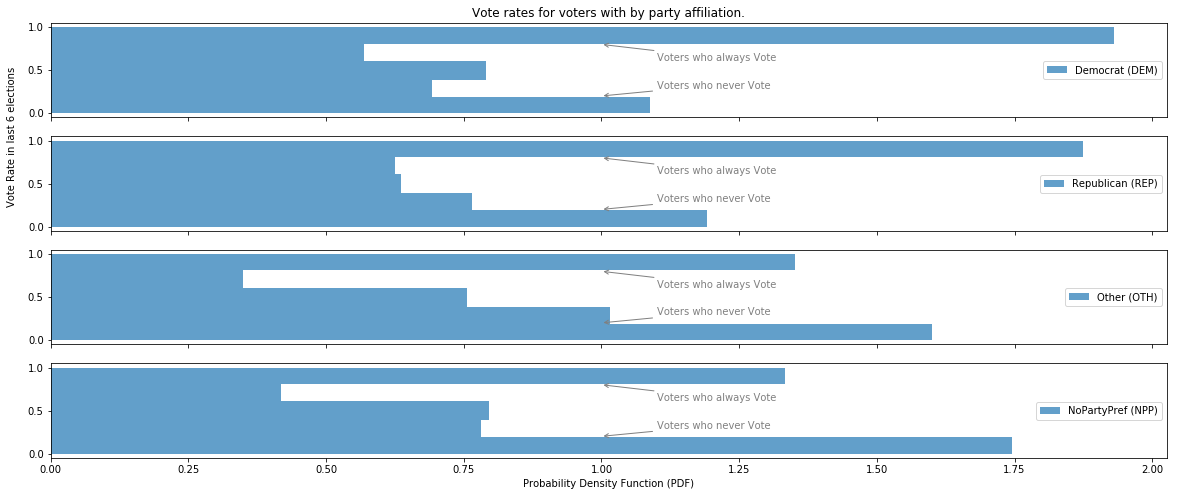

Number of Voters                                                 \
             Democrat (DEM) Republican (REP) Other (OTH) NoPartyPref (NPP)   
Always                 2285              664         125               958   
Over Half               710              233          34               316   
Half                   1084              261          81               662   
Under Half              864              285          99               591   
Never                  1289              422         148              1254   
Totals                 6232             1865         487              3781   

                Voters as a %                                       \
           Democrat (DEM)_pct Republican (REP)_pct Other (OTH)_pct   
Always                   36.7                 35.6            25.7   
Over Half                11.4                 12.5             7.0   
Half                     17.4                 14.0            16.6   
Under Half               13.9                 15.3            20.3   
Never                    20.7                 22.6            30.4   
Totals                  100.1                100.0           100.0   

                                  
           NoPartyPref (NPP)_pct  
Always                      25.3  
Over Half                    8.4  
Half                        17.5  
Under Half                  15.6  
Never                       33.2  
Totals                     100.0

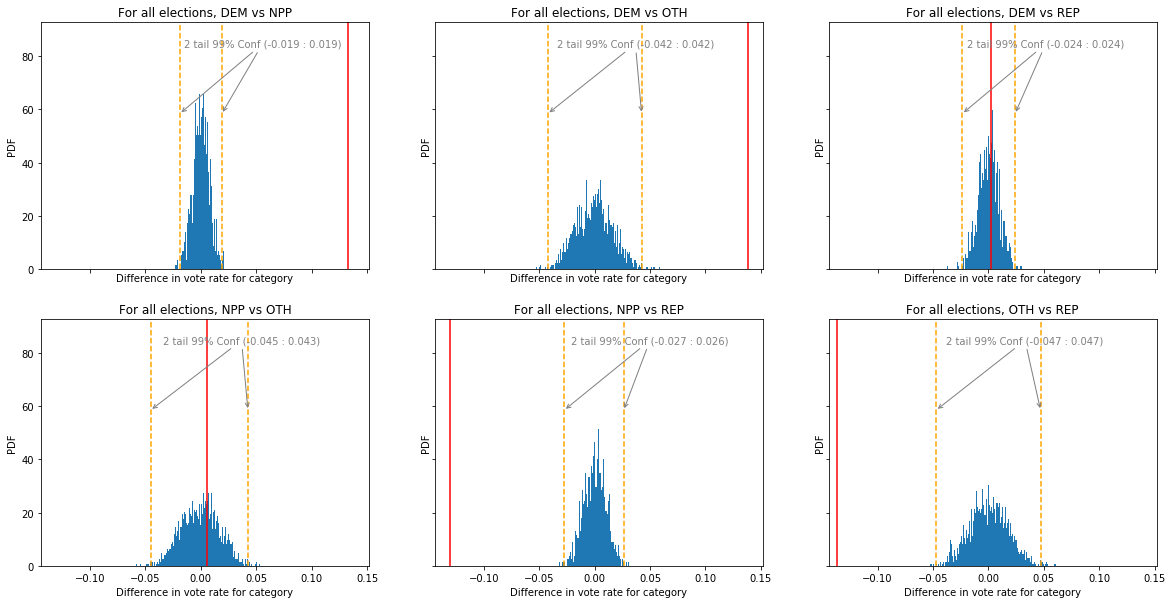

,votes_s0,elec_n0,rate_r0,votes_s1,elec_n1,rate_r1,emp_diff,perm_p
All elections DEM:NPP,16858,30828,54.6841,7291,17609,41.405,13.2791,0
All elections DEM:OTH,16858,30828,54.6841,937,2294,40.8457,13.8384,0
All elections DEM:REP,16858,30828,54.6841,5582,10246,54.4798,0.204256,0.413
All elections NPP:OTH,7291,17609,41.405,937,2294,40.8457,0.559279,0.373
All elections NPP:REP,7291,17609,41.405,5582,10246,54.4798,-13.0748,0
All elections OTH:REP,937,2294,40.8457,5582,10246,54.4798,-13.6341,0


In [8]:
# Gather data
e = 'E78'
vs, f = [e+'_nVotesPct', e+'_nVotesPos', e+'_nVotes'],['PartyMain']
df_w = clean_df(voters.loc[:,vs + f], f, vs)
df_g, df_s = df_w.loc[:,[e+'_nVotesPct']+f], df_w.loc[:,[e+'_nVotesPos',e+'_nVotes']+f]

# Summarize data
(k3, d3), (k2, d2), (k1, d1), (k0, d0) = df_g.groupby(f)
df_w = pd.DataFrame({k3:d3[vs[0]], k0:d0[vs[0]], k1:d1[vs[0]], k2:d2[vs[0]]})
title = 'Vote rates for voters with by party affiliation.'
df = show_vote_rate_and_summary(df_w, ['Democrat ('+k3+')','Republican ('+k0+')',
                                       'Other ('+k1+')','NoPartyPref ('+k2+')'], title)
# Run Stats
g3, g2, g1, g0 = df_s.groupby(f)
party_combos = itertools.combinations([g3,g2,g1,g0], 2)
layout = [(i,j) for i in range(4) for j in range(3)]
fig, axes = plt.subplots(2,3,figsize=(20,10), sharex=True, sharey=True)

df = pd.DataFrame(columns=outcols)

for ((kx,dx),(ky,dy)),loc in zip(party_combos,layout):
    sx,nx,rx,sy,ny,ry = get_two_sample_ns(dx, dy)
    pp, emp_diff, axes[loc] = two_sample_perm_test_diff_frac_votes(dx,dy,axes[loc],
                                                                  'all elections, {} vs {}'.format(kx,ky), tail=2)   
    df.loc['All elections '+kx+':'+ky,outcols] = [sx,nx,rx,sy,ny,ry,emp_diff*100,pp]
    
plt.show()
display(df)

This is a two tail test so any p-value with a magnitude of $<0.05$ would require us to reject the null hypothesis and conclude that the vote rate of the voters affiliated with the compared parties is not the same. However as you can see in the plots of the permutation test completed in two cases we fail to reject the null hypothesis:

We fail to reject in the following cases:
- DEM vs REP - the vote rate of someone affiliated with the Republicans is not statistically different from the vote rate for someone affiliated with the Democrats.
- NPP vs OTH - the vote rate of someone affiliated with the No Party is not statistically different from the vote rate for someone affiliated with one of the small parties.

We reject the null hypothesis in all the other cases, Our data indicates that with 99% confidence the vote rate of someone belonging to one of the two main parties (REP or DEM) is Significantly higher than the vote rate of someone belonging to one of the minor parties or holding No Party Preference.

## How does being a Permanent Absentee Ballot voter affect your vote rate?

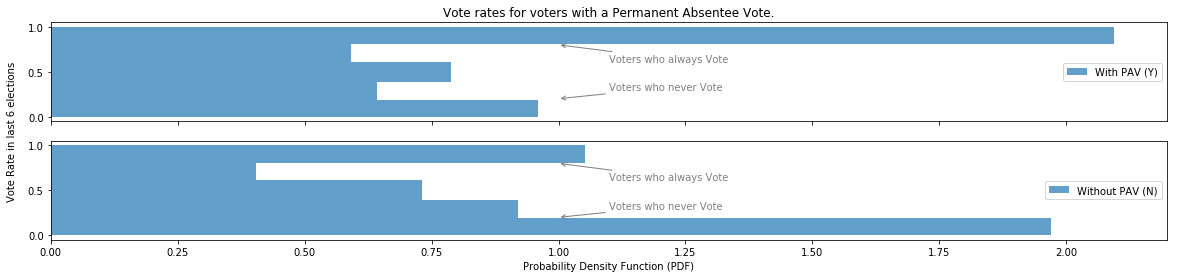

Number of Voters                    Voters as a %  \
               With PAV (Y) Without PAV (N) With PAV (Y)_pct   
Always                 3141             895             39.8   
Over Half               934             362             11.8   
Half                   1371             720             17.4   
Under Half             1014             825             12.8   
Never                  1439            1677             18.2   
Totals                 7899            4479            100.0   

                                
           Without PAV (N)_pct  
Always                    20.0  
Over Half                  8.1  
Half                      16.1  
Under Half                18.4  
Never                     37.4  
Totals                   100.0

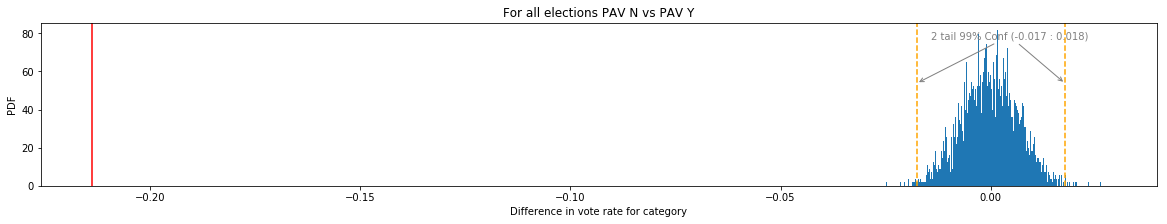

,votes_s0,elec_n0,rate_r0,votes_s1,elec_n1,rate_r1,emp_diff,perm_p
All elections PAV N:Y,8261,22460,36.7809,22440,38570,58.1799,-21.399,0


In [9]:
# Gather data
e = 'E78'
vs, f = [e+'_nVotesPct', e+'_nVotesPos', e+'_nVotes'],['PAV']
df_w = clean_df(voters.loc[:,vs + f], f, vs)

df_g, df_s = df_w.loc[:,[e+'_nVotesPct']+f], df_w.loc[:,[e+'_nVotesPos',e+'_nVotes']+f]

# Summarize data
(k1, d1), (k0, d0) = df_g.groupby(f)
df_w = pd.DataFrame({k0:d0[vs[0]],k1:d1[vs[0]]})
title = 'Vote rates for voters with a Permanent Absentee Vote.'
df = show_vote_rate_and_summary(df_w, ['With PAV ('+k0+')','Without PAV ('+k1+')'], title)

# Run Stats
(kx,dx),(ky,dy) = df_s.groupby(f)
fig, axes = plt.subplots(figsize=(20,3))

df = pd.DataFrame(columns=outcols)
sx,nx,rx,sy,ny,ry = get_two_sample_ns(dx, dy)
pp, emp_diff, axes = two_sample_perm_test_diff_frac_votes(dx,dy,axes,
                                                          'all elections PAV {} vs PAV {}'.format(kx,ky),tail=2)   
df.loc['All elections PAV '+kx+':'+ky,outcols] = [sx,nx,rx,sy,ny,ry,emp_diff*100,pp]

plt.show()
display(df)

The low P value indicates we have to reject the null hypothesis and concludes with 99% confidence that having a permanent Absentee Ballot significantly increases the likelihood of your being in the always voter category. Our observations indicate ~20% greater chance of being an always voter.

## How does Gender affect your vote rate?

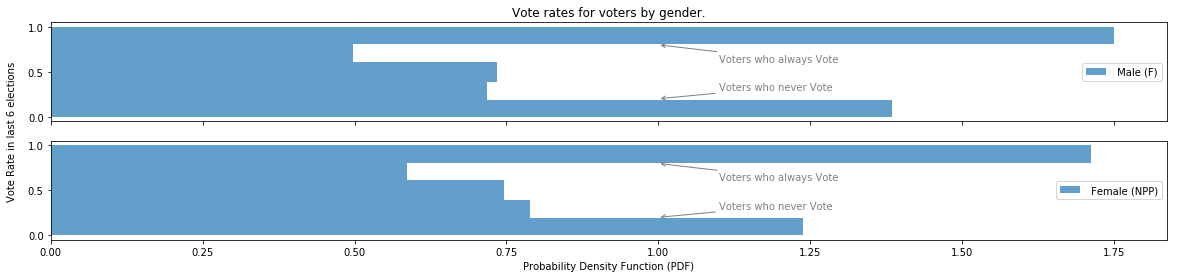

Number of Voters               Voters as a %                  
                   Male (F)  Female (NPP)  Male (F)_pct  Female (NPP)_pct
Always                 1751          1838          33.2              32.5
Over Half               524           663           9.9              11.7
Half                    851           928          16.2              16.4
Under Half              757           892          14.4              15.8
Never                  1386          1330          26.3              23.5
Totals                 5269          5651         100.0              99.9

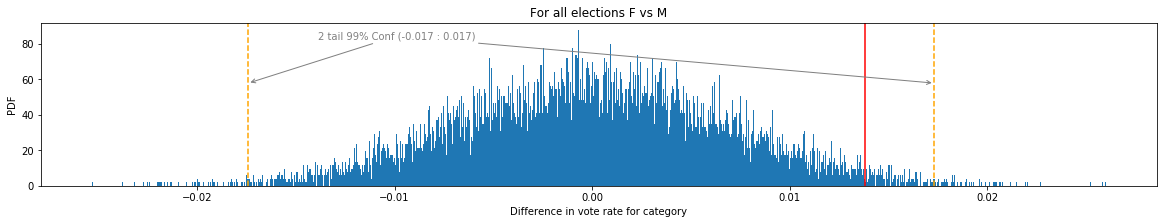

,votes_s0,elec_n0,rate_r0,votes_s1,elec_n1,rate_r1,emp_diff,perm_p
All elections Gender F:M,14797,28760,51.4499,13243,26449,50.0699,1.37998,0.0211


In [10]:
# Gather data
e = 'E78'
vs, f = [e+'_nVotesPct', e+'_nVotesPos', e+'_nVotes'],['Gender']
df_w = clean_df(voters.loc[:,vs + f], f, vs)

df_g, df_s = df_w.loc[:,[e+'_nVotesPct']+f], df_w.loc[:,[e+'_nVotesPos',e+'_nVotes']+f]

# Summarize data
(k1, d1),(k0, d0),(_, _) = df_g.groupby(f)
df_w = pd.DataFrame({k0:d0[vs[0]],k1:d1[vs[0]]})
title = 'Vote rates for voters by gender.'
df = show_vote_rate_and_summary(df_w, [' Male ('+k1+')',' Female ('+k2+')'], title)

# Run Stats
(kx,dx),(ky,dy),(_,_) = df_s.groupby(f)
fig, axes = plt.subplots(figsize=(20,3))

df = pd.DataFrame(columns=outcols)
sx,nx,rx,sy,ny,ry = get_two_sample_ns(dx, dy)
pp, emp_diff, axes = two_sample_perm_test_diff_frac_votes(dx,dy,axes,
                                                          'all elections {} vs {}'.format(kx,ky),tail=2)   
df.loc['All elections Gender '+kx+':'+ky,outcols] = [sx,nx,rx,sy,ny,ry,emp_diff*100,pp]

plt.show()
display(df)

Running our Statistical Significance permutation test indicates that we fail to reject the null hypothesis and can say with 99% confidence that the variation in male and female vote rate we see is likely due to chance.

It is interesting to observe that on an individual level men are more likely to be a member of one of the extreme categories (ie always voting or never voting), women are more likely to sometimes cast their ballot.

## Does the type of house you live in affect your vote rate?

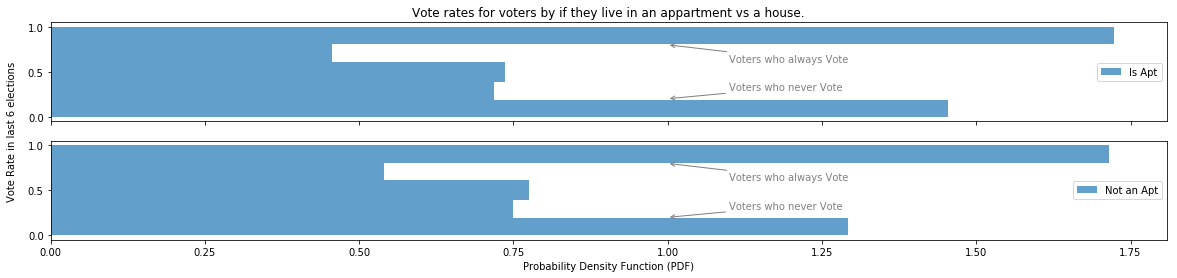

Number of Voters            Voters as a %               
                     Is Apt Not an Apt    Is Apt_pct Not an Apt_pct
Always                  809       3227          32.7           32.6
Over Half               225       1071           9.1           10.8
Half                    400       1691          16.2           17.1
Under Half              355       1484          14.4           15.0
Never                   683       2433          27.6           24.6
Totals                 2472       9906         100.0          100.1

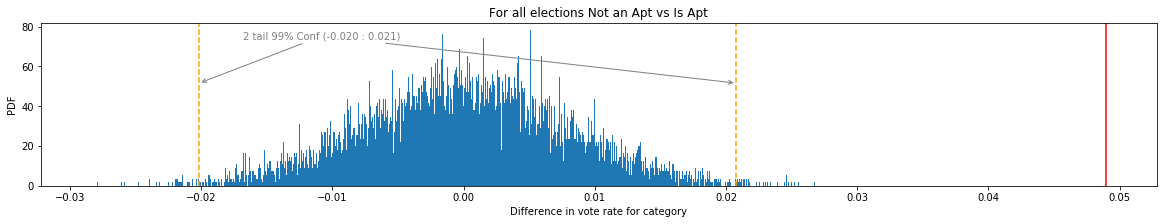

,votes_s0,elec_n0,rate_r0,votes_s1,elec_n1,rate_r1,emp_diff,perm_p
All elections Not an Apt:Is Apt,25635,50085,51.183,5066,10945,46.286,4.89701,0


In [11]:
# Gather data
e = 'E78'
vs, f = [e+'_nVotesPct', e+'_nVotesPos', e+'_nVotes'],['isApt']
df_w = clean_df(voters.loc[:,vs + f], f, vs)

df_g, df_s = df_w.loc[:,[e+'_nVotesPct']+f], df_w.loc[:,[e+'_nVotesPos',e+'_nVotes']+f]

# Summarize data
(k1, d1),(k0, d0) = df_g.groupby(f)
df_w = pd.DataFrame({k0:d0[vs[0]],k1:d1[vs[0]]})
title = 'Vote rates for voters by if they live in an appartment vs a house.'
df = show_vote_rate_and_summary(df_w, ['Is Apt','Not an Apt'], title)

# Run Stats
(kx,dx),(ky,dy) = df_s.groupby(f)
fig, axes = plt.subplots(figsize=(20,3))
kx = 'Is Apt' if kx else 'Not an Apt'
ky = 'Is Apt' if kx else 'Not an Apt'

df = pd.DataFrame(columns=outcols)
sx,nx,rx,sy,ny,ry = get_two_sample_ns(dx, dy)
pp, emp_diff, axes = two_sample_perm_test_diff_frac_votes(dx,dy,axes,
                                                          'all elections {} vs {}'.format(kx,ky),tail=2)   
df.loc['All elections '+kx+':'+ky,outcols] = [sx,nx,rx,sy,ny,ry,emp_diff*100,pp]

plt.show()
display(df)

Voters who live in apartments are less likely to vote than voters who's address does not include an apartment number (obs:  $\approx4.9\%$ ). This is a statistically significant result at $99\%$ confidence.

It is interesting to notice that voters living in Apartments seem a little more likely to be in the never voter category although are members of the always vote category about as frequently as other voters.

## Does who you live with affect your vote rate?

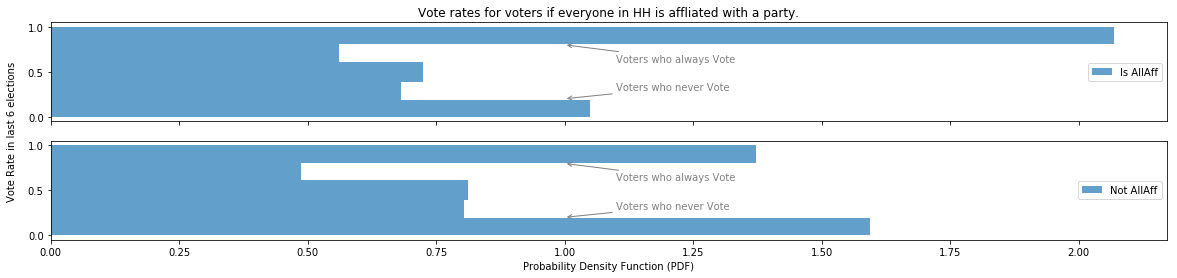

Number of Voters            Voters as a %               
                  Is AllAff Not AllAff Is AllAff_pct Not AllAff_pct
Always                 2403       1633          39.3           26.1
Over Half               687        609          11.2            9.7
Half                    974       1117          15.9           17.8
Under Half              833       1006          13.6           16.1
Never                  1220       1896          19.9           30.3
Totals                 6117       6261          99.9          100.0

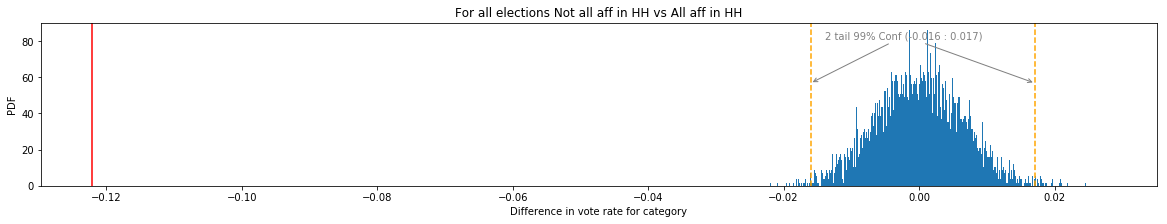

,votes_s0,elec_n0,rate_r0,votes_s1,elec_n1,rate_r1,emp_diff,perm_p
All elections Not all aff in HH:All aff in HH,13289,30122,44.1173,17412,30908,56.3349,-12.2177,0


In [12]:
# Gather data
e = 'E78'
vs, f = [e+'_nVotesPct', e+'_nVotesPos', e+'_nVotes'],['allAffInHH']
df_w = clean_df(voters.loc[:,vs + f], f, vs)

df_g, df_s = df_w.loc[:,[e+'_nVotesPct']+f], df_w.loc[:,[e+'_nVotesPos',e+'_nVotes']+f]

# Summarize data
(k1, d1),(k0, d0) = df_g.groupby(f)
df_w = pd.DataFrame({k0:d0[vs[0]],k1:d1[vs[0]]})
title = 'Vote rates for voters if everyone in HH is affliated with a party.'
df = show_vote_rate_and_summary(df_w, ['Is AllAff','Not AllAff'], title)

# Run Stats
(kx,dx),(ky,dy) = df_s.groupby(f)
fig, axes = plt.subplots(figsize=(20,3))
kx = 'All aff in HH' if kx else 'Not all aff in HH'
ky = 'All aff in HH' if kx else 'Not all aff in HH'

df = pd.DataFrame(columns=outcols)
sx,nx,rx,sy,ny,ry = get_two_sample_ns(dx, dy)
pp, emp_diff, axes = two_sample_perm_test_diff_frac_votes(dx,dy,axes,
                                                          'all elections {} vs {}'.format(kx,ky),tail=2)   
df.loc['All elections '+kx+':'+ky,outcols] = [sx,nx,rx,sy,ny,ry,emp_diff*100,pp]

plt.show()
display(df)

If everyone in your house hold is affiliated with a political party you are  $12\%$  more likely to vote than if you don't live in such a household. This result was statistically significant at $99\%$ confidence. This included single voter households.

It is likely that this is an effect caused by the same thing that causes people affiliated with REP or DEM to vote more. To understand the relationships here a little more I also looked at those living in multi voter households were they more or less likely to vote if everyone in the household was affiliated with the same party

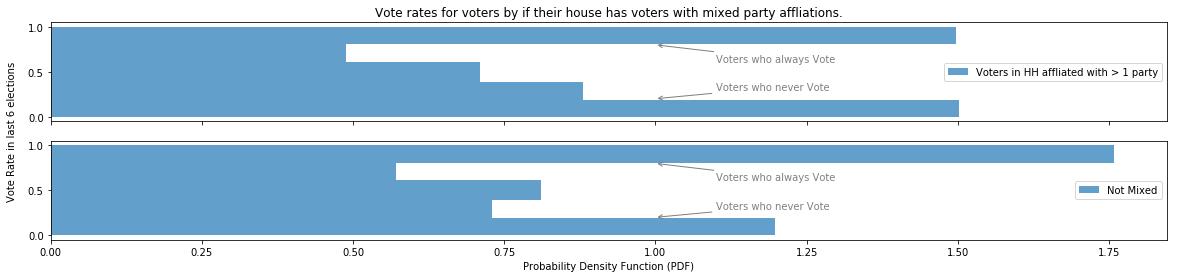

Number of Voters            \
           Voters in HH affliated with > 1 party Not Mixed   
Always                                       585      2534   
Over Half                                    201       867   
Half                                         321      1353   
Under Half                                   362      1108   
Never                                        587      1726   
Totals                                      2056      7588   

                                       Voters as a %                
           Voters in HH affliated with > 1 party_pct Not Mixed_pct  
Always                                          28.5          33.4  
Over Half                                        9.8          11.4  
Half                                            15.6          17.8  
Under Half                                      17.6          14.6  
Never                                           28.6          22.7  
Totals                                         100.1          99.9

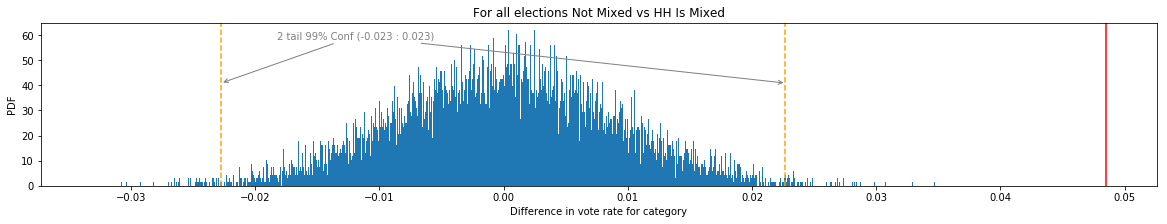

,votes_s0,elec_n0,rate_r0,votes_s1,elec_n1,rate_r1,emp_diff,perm_p
All elections Not Mixed:HH Is Mixed,19510,37490,52.0405,5029,10657,47.1896,4.8509,0


In [13]:
# Gather data
e = 'E78'
vs, f = [e+'_nVotesPct', e+'_nVotesPos', e+'_nVotes'],['mixedAfflsInHH','nVotersInHH']
df_w = clean_df(voters.loc[:,vs + f], f, vs)
#removing housholds with less than one voter 
df_w = df_w.loc[df_w.nVotersInHH>1]
df_g, df_s = df_w.loc[:,[e+'_nVotesPct']+f], df_w.loc[:,[e+'_nVotesPos',e+'_nVotes']+f]

# Summarize data
(k1, d1),(k0, d0) = df_g.groupby(['mixedAfflsInHH'])
df_w = pd.DataFrame({k0:d0[vs[0]],k1:d1[vs[0]]})
title = 'Vote rates for voters by if their house has voters with mixed party affliations.'
df = show_vote_rate_and_summary(df_w, ['Voters in HH affliated with > 1 party','Not Mixed'], title)

# Run Stats
(kx,dx),(ky,dy) = df_s.groupby(['mixedAfflsInHH'])
fig, axes = plt.subplots(figsize=(20,3))
kx = 'HH Is Mixed' if kx else 'Not Mixed'
ky = 'HH Is Mixed' if kx else 'Not Mixed'

df = pd.DataFrame(columns=outcols)
sx,nx,rx,sy,ny,ry = get_two_sample_ns(dx, dy)
pp, emp_diff, axes = two_sample_perm_test_diff_frac_votes(dx,dy,axes,
                                                          'all elections {} vs {}'.format(kx,ky),tail=2)   
df.loc['All elections '+kx+':'+ky,outcols] = [sx,nx,rx,sy,ny,ry,emp_diff*100,pp]

plt.show()
display(df)

Living in a household with people who are affiliated with another party meant you were $4.9\%$ (SS at 99%) less likely to vote than if you lived in a household where all the voters in the household were affiliated with the same party. (NPP voters did not count as affiliated and single voter households were removed from the analysis)